<a href="https://colab.research.google.com/github/UtkarshSingh3773/Development-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Load the dataset and perform an initial inspection.
#### Import necessary libraries (pandas, matplotlib, seaborn) and load the "HousePricePrediction.xlsx" file.
#### The head of the dataset will be printed to understand its structure.

In [77]:
# Import necessary libraries: pandas for data manipulation, matplotlib.pyplot and seaborn for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file named "HousePricePrediction.xlsx"
dataset = pd.read_excel("HousePricePrediction.xlsx")

# Print the first 5 rows of the dataset to get a preview of the data
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [78]:
# Check the dimensions of the dataset.
# Use the .shape attribute to see the number of rows and columns.

In [79]:
# Display the dimensions of the dataset (number of rows and columns)
dataset.shape

(2919, 13)

In [80]:
# Identify and count variables by their data types.
# Differentiate between object (categorical), integer, and float (numerical) variables.
# The counts of each type will be printed.

In [81]:
# Identify columns with 'object' data type, which are typically categorical
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
# Print the number of categorical variables found
print("Categorical variables:",len(object_cols))

# Identify columns with 'int' data type, which are integer numerical variables
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
# Print the number of integer variables found
print("Integer variables:",len(num_cols))

# Identify columns with 'float' data type, which are float numerical variables
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
# Print the number of float variables found
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


In [82]:
# Visualize the correlation between numerical features.
# A heatmap will be generated to show the correlation matrix of numerical variables.
# This helps in understanding relationships and potential multicollinearity.

<Axes: >

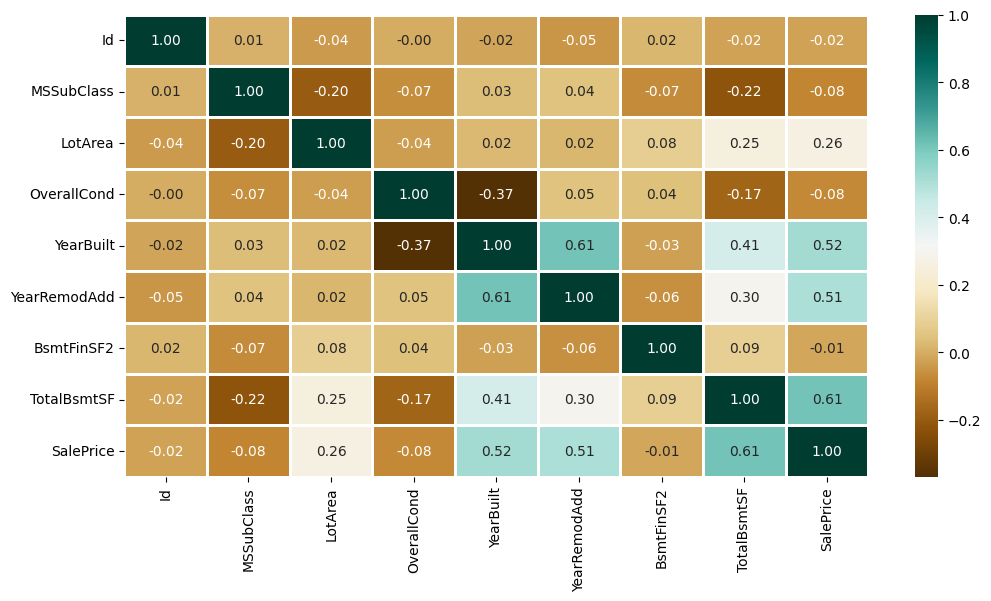

In [83]:
# Select only the numerical columns from the dataset
numerical_dataset = dataset.select_dtypes(include=['number'])

# Create a heatmap to visualize the correlation matrix of the numerical features
# The heatmap helps understand the relationships between numerical variables
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG', # Color map for the heatmap
            fmt = '.2f', # Format to display correlation values with two decimal places
            linewidths = 2, # Width of the lines separating cells
            annot = True) # Display the correlation values on the heatmap

In [84]:
# Analyze the unique values in categorical features.
# Calculate and plot the number of unique values for each categorical variable.
# This helps understand the cardinality of categorical variables.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

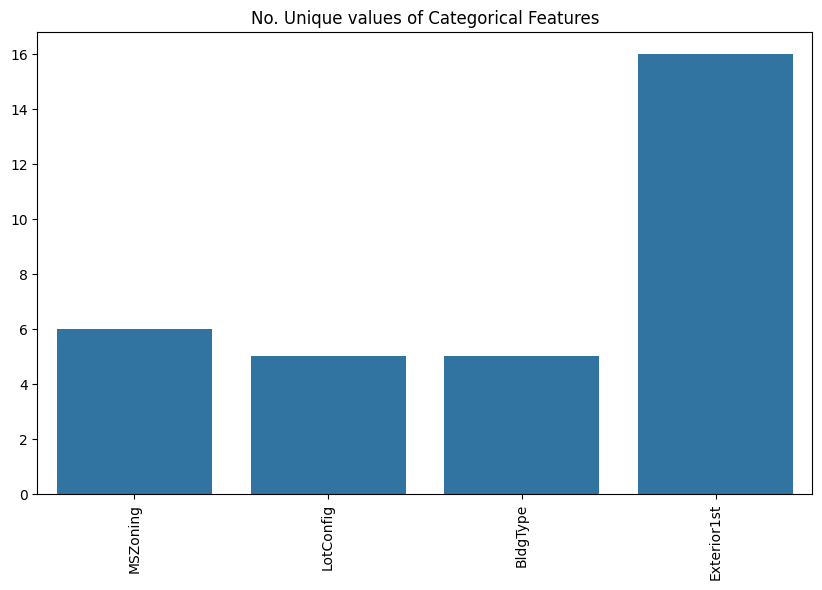

In [85]:
# Initialize an empty list to store the number of unique values for each categorical column
unique_values = []
# Iterate through each categorical column name
for col in object_cols:
  # Append the count of unique values in the current column to the list
  unique_values.append(dataset[col].unique().size)

# Create a figure for the bar plot
plt.figure(figsize=(10,6))
# Set the title of the plot
plt.title('No. Unique values of Categorical Features')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
# Create a bar plot with categorical column names on the x-axis and unique value counts on the y-axis
sns.barplot(x=object_cols,y=unique_values)

In [86]:
# Visualize the distribution of categorical features.
# Bar plots will be generated to show the frequency of each category for each categorical variable.

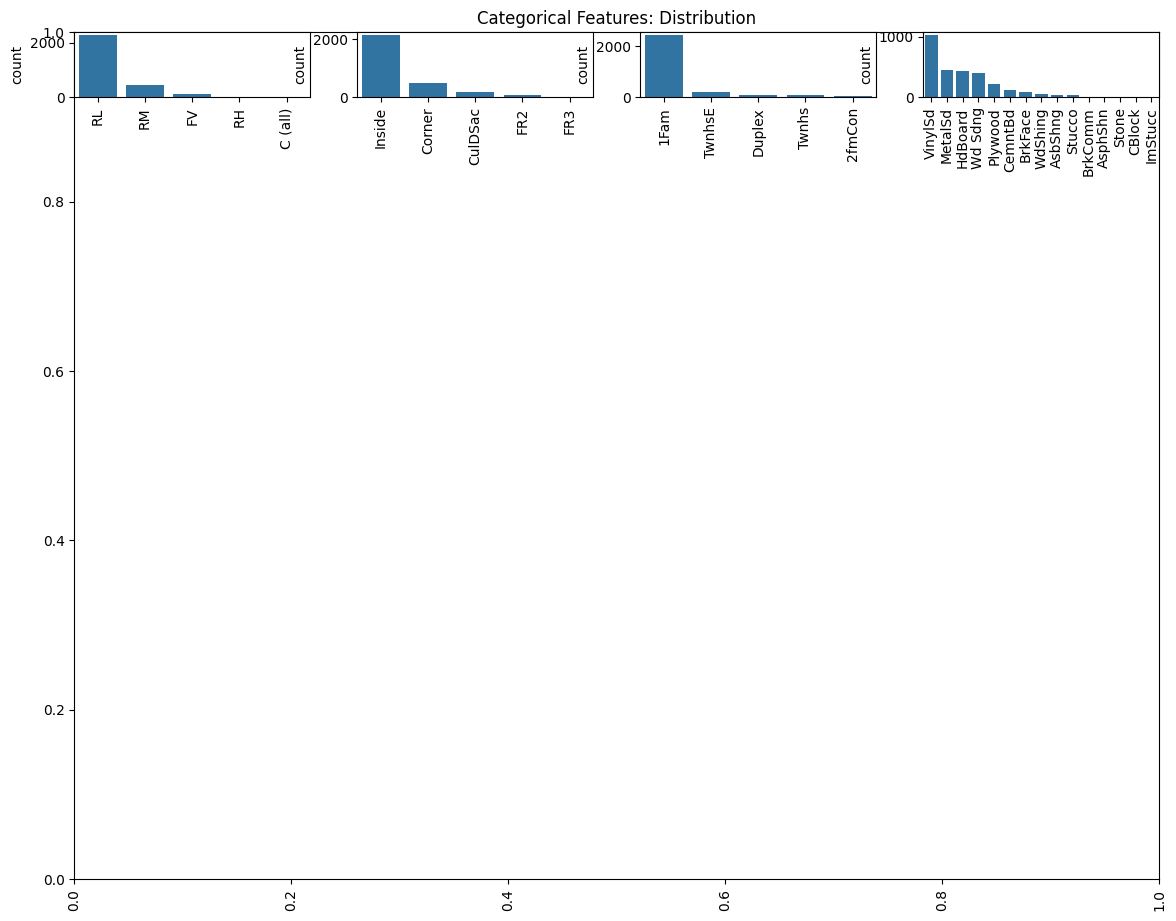

In [87]:
# Create a figure for the subplots, with a specified size
plt.figure(figsize=(14,11)) # Or another suitable size for your subplots
# Set the overall title for the figure
plt.title('Categorical Features: Distribution')
# Rotate the x-axis labels for better readability in the subplots
plt.xticks(rotation=90)
# Initialize an index for placing subplots
index = 1

# Iterate through each categorical column
for col in object_cols:
    # Get the value counts for the current categorical column
    y = dataset[col].value_counts()
    # Create a subplot within the figure. The grid size is set to 11 rows and 4 columns.
    # The index determines the position of the current subplot.
    # Adjust the subplot grid if needed based on the number of categorical columns
    # For example, if you have 20 categorical columns, an 11x4 grid might not be enough.
    # You might need a larger grid like (5, 4) if you have 20 columns.
    plt.subplot(11, 4, index)
    # Rotate the x-axis labels for the current subplot
    plt.xticks(rotation=90)
    # Create a bar plot for the value counts of the current categorical column
    sns.barplot(x=list(y.index), y=y)
    # Increment the subplot index
    index += 1

In [88]:
# Drop the 'Id' column.
# The 'Id' column is an identifier and is not useful for the prediction task.
# We will remove it from the dataset.

In [89]:
# Drop the 'Id' column from the dataset
# 'Id' is typically an identifier and not useful for training a machine learning model
dataset.drop(['Id'],
             axis=1, # axis=1 indicates dropping a column
             inplace=True) # inplace=True modifies the dataset directly

In [90]:
# Handle missing values in the 'SalePrice' column.
# Fill the missing values in 'SalePrice' with the mean of the existing values.
# This is a common imputation strategy for numerical data.

In [91]:
# Fill missing values in the 'SalePrice' column with the mean of the existing values
# This is a common strategy for handling missing numerical data
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

In [92]:
# Handle remaining missing values by dropping rows.
# Create a new dataset by removing any rows that still contain missing values.
# This approach is suitable if the number of rows with missing values is small.

In [93]:
# Create a new dataset by dropping all rows that contain any missing values
# This is another way to handle missing data, suitable if the number of rows with missing values is small
new_dataset = dataset.dropna()

In [94]:
# Verify that there are no missing values in the cleaned dataset.
# Check for the count of missing values in each column of the new dataset.

In [95]:
# Check for missing values in the 'new_dataset'
# This line will show the count of missing values for each column in the cleaned dataset
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [96]:
# Prepare for One-Hot Encoding of categorical features.
# Identify the categorical columns in the cleaned dataset.
# The names and count of categorical features will be printed.

In [97]:
# Import the OneHotEncoder class from scikit-learn for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Identify columns in 'new_dataset' that have 'object' data type (categorical)
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
# Print the names of the identified categorical variables
print("Categorical variables:")
print(object_cols)
# Print the total number of categorical features
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [98]:
# Apply One-Hot Encoding to categorical features.
# Use the OneHotEncoder to convert categorical variables into a numerical format.
# The original categorical columns will be dropped, and the new one-hot encoded columns will be added.

In [99]:
# Initialize the OneHotEncoder
# sparse_output=False ensures the output is a dense array
# handle_unknown='ignore' tells the encoder to ignore unknown categories during transform
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns and create a pandas DataFrame
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
# Set the index of the new DataFrame to match the index of 'new_dataset'
OH_cols.index = new_dataset.index
# Get the new column names generated by the one-hot encoder
OH_encoder.get_feature_names_out()
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop the original categorical columns from 'new_dataset'
df_final = new_dataset.drop(object_cols, axis=1)
# Concatenate the one-hot encoded columns with the rest of the numerical features
df_final = pd.concat([df_final, OH_cols], axis=1)

In [100]:
# Split the data into training and validation sets.
# The data will be divided into features (X) and the target variable (Y).
# Use an 80/20 split for training and validation, ensuring reproducibility.

In [101]:
# Import necessary modules for model evaluation and data splitting
from sklearn.metrics import mean_absolute_error # Although not used in the provided code, it's imported
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the target variable 'SalePrice'
X = df_final.drop(['SalePrice'], axis=1)
# Define the target variable (Y)
Y = df_final['SalePrice']

# Split the data into training and validation sets
# 80% for training, 20% for validation
# random_state=0 ensures reproducibility of the split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [102]:
# Train and evaluate a Support Vector Regressor (SVR) model.
# Initialize the SVR model, train it on the training data, and make predictions on the validation data.
# The Mean Absolute Percentage Error (MAPE) will be calculated and printed.

In [103]:
# Train and evaluate a Support Vector Regressor (SVR) model
# SVM
# Import necessary SVM classes
from sklearn import svm
from sklearn.svm import SVC
# Import the Mean Absolute Percentage Error metric
from sklearn.metrics import mean_absolute_percentage_error

# Initialize the SVR model
model_SVR = svm.SVR()
# Train the SVR model on the training data
model_SVR.fit(X_train,Y_train)
# Make predictions on the validation data
Y_pred = model_SVR.predict(X_valid)

# Print the Mean Absolute Percentage Error (MAPE) between the true and predicted validation values
print(f"Mean Absolute Percentage Error (MAPE) for SVR model: {mean_absolute_percentage_error(Y_valid, Y_pred)}")

Mean Absolute Percentage Error (MAPE) for SVR model: 0.1870512931870423


In [104]:
# Train and evaluate a Random Forest Regressor model.
# Initialize a Random Forest Regressor, train it, and make predictions on the validation data.
# The Mean Absolute Percentage Error (MAPE) will be calculated and printed.

In [105]:
# Train and evaluate a Random Forest Regressor model
# random forest
# Import the RandomForestRegressor class
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model with 10 estimators (decision trees)
model_RFR = RandomForestRegressor(n_estimators=10)
# Train the Random Forest model on the training data
model_RFR.fit(X_train, Y_train)
# Make predictions on the validation data
Y_pred = model_RFR.predict(X_valid)

# Calculate and print the Mean Absolute Percentage Error (MAPE) for the Random Forest model
print(f"Mean Absolute Percentage Error (MAPE) for Random Forest model: {mean_absolute_percentage_error(Y_valid, Y_pred)}")

Mean Absolute Percentage Error (MAPE) for Random Forest model: 0.1920909759730805


In [106]:
# Train and evaluate a Linear Regression model.
# Initialize a Linear Regression model, train it, and make predictions on the validation data.
# The Mean Absolute Percentage Error (MAPE) will be calculated and printed.

In [107]:
# Train and evaluate a Linear Regression model
# Linear Regression
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_LR = LinearRegression()
# Train the Linear Regression model on the training data
model_LR.fit(X_train, Y_train)
# Make predictions on the validation data
Y_pred = model_LR.predict(X_valid)

# Print the Mean Absolute Percentage Error (MAPE) for the Linear Regression model
print(f"Mean Absolute Percentage Error (MAPE) for Linear Regression model: {mean_absolute_percentage_error(Y_valid, Y_pred)}")

Mean Absolute Percentage Error (MAPE) for Linear Regression model: 0.1874168384159986
